# import libraries 

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [9]:
# initialize file names
f1 = 'dataset1.csv' # 
f2 = 'dataset2.csv' #
f3 = 'dataset3.csv' #

# initialize dataframes: all empty
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

files_list = [f1, f2, f3]

# funcation to load in df

In [10]:
# initialize dataframes: all empty
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

files_list = [f1, f2, f3]

def load_df(fname, df, name):
  file_path = 'dataset-csv-files/' + fname

  # Read the CSV file
  new_data = pd.read_csv(file_path)

  # If df is still empty, you can directly assign new_data to df
  if df.empty:
    df = new_data
  else:
    # Concatenate the new data with the existing DataFrame
    df = pd.concat([df, new_data], ignore_index=True)

  print(name + ' has loaded in.')
  #print(df.shape)
  #print(df.head())
  #print('\n')
  return df

df1 = load_df(f1, df1, 'df1')
df2 = load_df(f2, df2, 'df2')
df3 = load_df(f3, df3, 'df3')

df_list = [df1, df2, df3]

df1 has loaded in.
df2 has loaded in.
df3 has loaded in.


# map df values for datasets

In [11]:
# Dataset 1
df1_texts = df1['review_text'].values
df1_labels = df1['class_index'].map({1: 0, 2: 1}).values

# Dataset 2
df2_texts = df2['text'].values
df2_labels = df2['label'].map({'__label__2': 1, '__label__1': 0}).values.astype(int)

# Dataset 3
df3_texts = df3['reviewText'].astype(str).values # Your text data
df3_labels = df3['rating']

# Vanilla rnn

In [12]:
def VanillaRNN(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 64

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    x_temp, x_test, y_temp, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

    RNN_model = Sequential(name="Simple_RNN")
    RNN_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    RNN_model.add(SimpleRNN(128))
    RNN_model.add(Dense(1, activation='sigmoid'))

    RNN_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    history = RNN_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1, validation_data=(x_valid.astype(int), y_valid.astype(int)))

    score = RNN_model.evaluate(x_test.astype(int), y_test.astype(int), verbose=0)
    print(f"\n{name} Vanilla RNN Score---> {score}")
    print()

    print(f'Visualize data for: {name}')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Embd_64 Vanilla RNN Model accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Embd_64 Vanilla RNN Model loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# model training 

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.5069 - loss: 0.6995 - val_accuracy: 0.5425 - val_loss: 0.6867
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5717 - loss: 0.6749 - val_accuracy: 0.5775 - val_loss: 0.6724
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.6633 - loss: 0.6345 - val_accuracy: 0.5860 - val_loss: 0.6654
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7452 - loss: 0.5603 - val_accuracy: 0.6150 - val_loss: 0.6677
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7932 - loss: 0.4548 - val_accuracy: 0.6895 - val_loss: 0.6380
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8653 - loss: 0.3207 - val_accuracy: 0.7065 - val_loss: 0.6163
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9112 - loss: 0.2396 - val_accuracy: 0.7035 - val_loss: 0.7230
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9346 - loss: 0.1788 - val_accuracy: 0.7155 - v

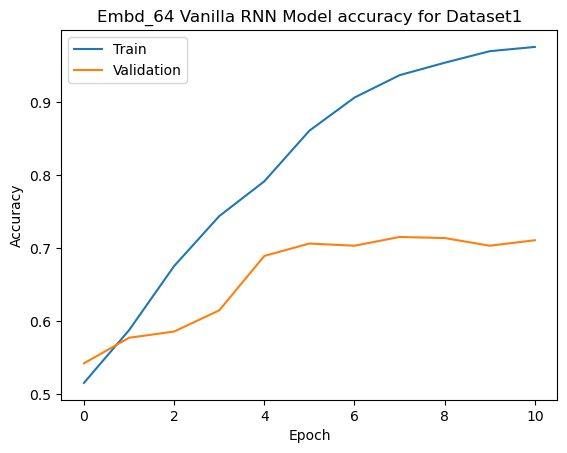

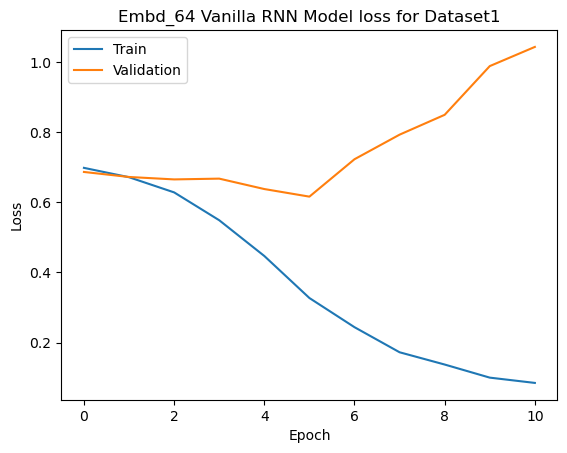

In [13]:
VanillaRNN(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5102 - loss: 0.6958 - val_accuracy: 0.5395 - val_loss: 0.6848
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7127 - loss: 0.6103 - val_accuracy: 0.5100 - val_loss: 0.7614
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6875 - loss: 0.5960 - val_accuracy: 0.6770 - val_loss: 0.5888
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8276 - loss: 0.4005 - val_accuracy: 0.7820 - val_loss: 0.4710
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8745 - loss: 0.3001 - val_accuracy: 0.7905 - val_loss: 0.4548
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9251 - loss: 0.2140 - val_accuracy: 0.7805 - val_loss: 0.5336
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9406 - loss: 0.1680 - val_accuracy: 0.7770 - val_loss: 0.5741
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9276 - loss: 0.1948 - val_accuracy: 0.7780 - v

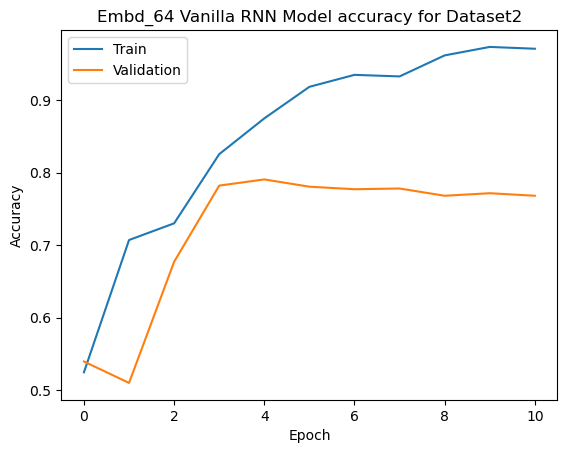

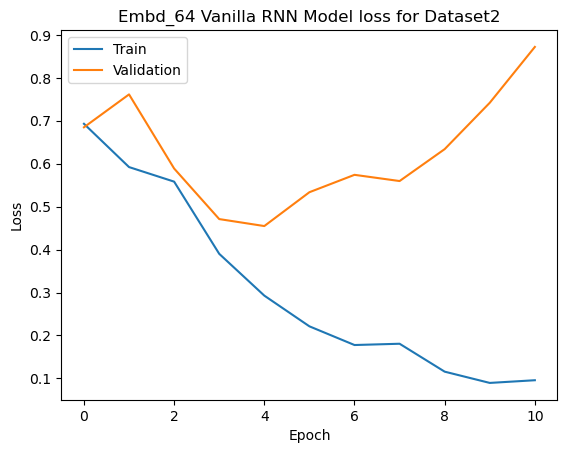

In [14]:
VanillaRNN(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 72s 629ms/step - accuracy: 0.5409 - loss: 0.7040 - val_accuracy: 0.7067 - val_loss: 0.5849
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 69s 607ms/step - accuracy: 0.8111 - loss: 0.4318 - val_accuracy: 0.7925 - val_loss: 0.4590
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 69s 607ms/step - accuracy: 0.9350 - loss: 0.1970 - val_accuracy: 0.8042 - val_loss: 0.4737
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 69s 610ms/step - accuracy: 0.9904 - loss: 0.0519 - val_accuracy: 0.7258 - val_loss: 0.6602
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 69s 607ms/step - accuracy: 0.9987 - loss: 0.0202 - val_accuracy: 0.7854 - val_loss: 0.6284
Epoch 6/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 71s 625ms/step - accuracy: 0.9996 - loss: 0.0045 - val_accuracy: 0.8017 - val_loss: 0.6977
Epoch 7/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 73s 645ms/step - accuracy: 0.9832 - loss: 0.0447 - val_accuracy: 0.7504 - val_loss: 0.7076
Epoch 8/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 73s 643ms/step - accuracy: 0.9710 - loss: 0

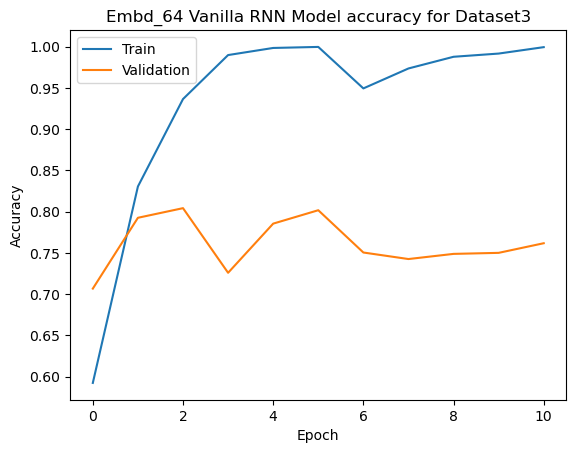

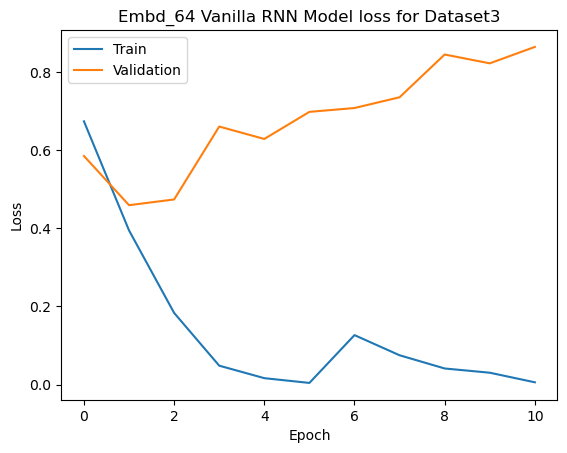

In [15]:
VanillaRNN(df3_texts, df3_labels, 'Dataset3')

# GRU

In [16]:
def GRU_Model(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    x_train, x_test, y_train, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    gru_model = Sequential(name=f"GRU_{name}")
    gru_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    gru_model.add(GRU(128, activation='tanh', return_sequences=False))
    gru_model.add(Dense(1, activation='sigmoid'))

    gru_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    history = gru_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1, validation_data=(x_valid, y_valid))

    score = gru_model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} GRU Model Score---> {score}")

    # Plot training & validation accuracy values
    plt.xlim(1, 10)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Embd_64 GRU Model Accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.xlim(1, 10)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Embd_64 GRU Model Loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.5629 - loss: 0.6769 - val_accuracy: 0.7405 - val_loss: 0.5264
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.8243 - loss: 0.3928 - val_accuracy: 0.7920 - val_loss: 0.4708
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.9034 - loss: 0.2477 - val_accuracy: 0.7965 - val_loss: 0.5069
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.9423 - loss: 0.1581 - val_accuracy: 0.8025 - val_loss: 0.5456
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.9680 - loss: 0.1053 - val_accuracy: 0.7915 - val_loss: 0.6981
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.9704 - loss: 0.0772 - val_accuracy: 0.7860 - val_loss: 0.7826
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.9855 - loss: 0.0528 - val_accuracy: 0.7930 - val_loss: 0.8636
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.9868 - loss: 0.0412 - val_accu

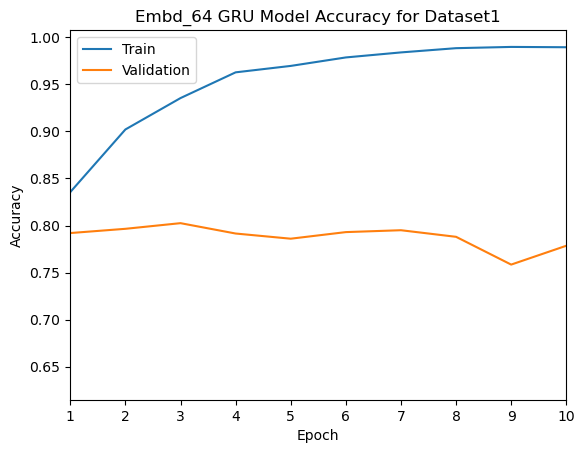

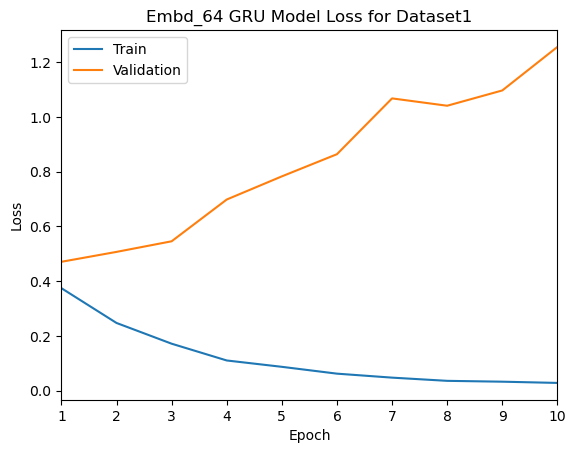

In [17]:
GRU_Model(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.5505 - loss: 0.7013 - val_accuracy: 0.6685 - val_loss: 0.6304
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.7428 - loss: 0.5609 - val_accuracy: 0.7880 - val_loss: 0.4669
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.8621 - loss: 0.3236 - val_accuracy: 0.8200 - val_loss: 0.4296
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.9182 - loss: 0.2123 - val_accuracy: 0.8070 - val_loss: 0.4618
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.9588 - loss: 0.1362 - val_accuracy: 0.8020 - val_loss: 0.5427
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.9682 - loss: 0.0991 - val_accuracy: 0.8090 - val_loss: 0.5492
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.9845 - loss: 0.0603 - val_accuracy: 0.7855 - val_loss: 0.5971
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - accuracy: 0.9858 - loss: 0.0543 - val_accu

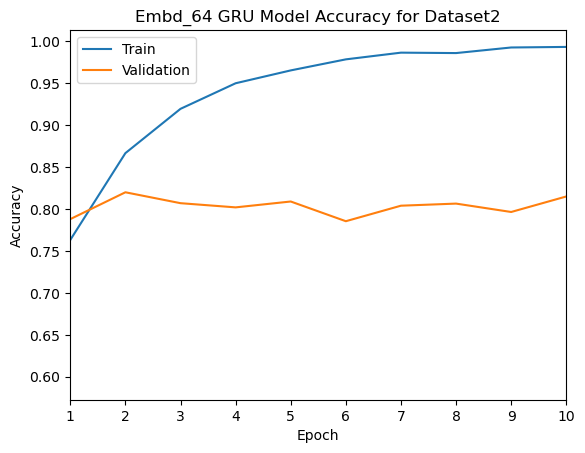

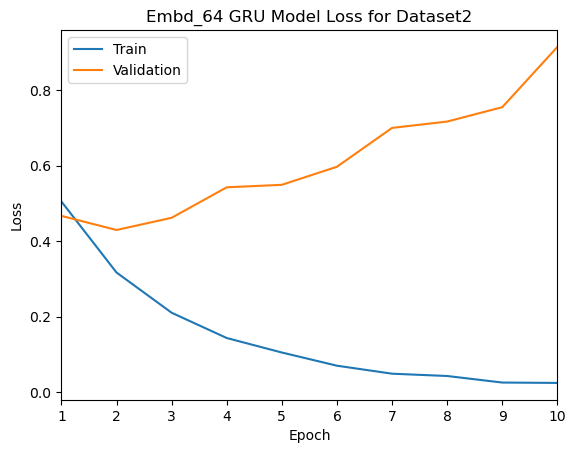

In [18]:
GRU_Model(df2_texts, df2_labels, 'Dataset2')

In [19]:
GRU_Model(df3_texts, df3_labels, 'Dataset3')

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5732 - loss: 0.6827 - val_accuracy: 0.6896 - val_loss: 0.5911
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.7695 - loss: 0.4902 - val_accuracy: 0.7983 - val_loss: 0.4307
Epoch 3/11
 88/113 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8692 - loss: 0.3114

# LSTM

In [ ]:
def LSTM_Model(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    # Tokenization and sequence padding
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    # Splitting the dataset into train, validation, and test sets
    x_train, x_test, y_train, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    # Defining the LSTM model
    lstm_model = Sequential(name=f"LSTM_{name}")
    lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    lstm_model.add(LSTM(128, activation='tanh', return_sequences=False))
    lstm_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    lstm_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    # Training the model
    history = lstm_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=2, validation_data=(x_valid, y_valid))

    # Evaluating the model
    score = lstm_model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} LSTM Model Score---> {score}")

    # Visualization of training and validation metrics
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Embd_64 LSTM Model Accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Embd_64 LSTM Model Loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# testing models

In [ ]:
LSTM_Model(df1_texts, df1_labels, 'Dataset1')

In [ ]:
LSTM_Model(df2_texts, df2_labels, 'Dataset2')

In [ ]:
LSTM_Model(df3_texts, df3_labels, 'Dataset3')